Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,306 (419.16 KB)

 Trainable params: 106,922 (417.66 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.3307 - loss: 3.8344 - val_accuracy: 0.4842 - val_loss: 1.4687 - learning_rate: 0.0100
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.5896 - loss: 1.1569 - val_accuracy: 0.6413 - val_loss: 1.0344 - learning_rate: 0.0100
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.6722 - loss: 0.9432 - val_accuracy: 0.6163 - val_loss: 1.0831 - learning_rate: 0.0100
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.7175 - loss: 0.8106 - val_accuracy: 0.5529 - val_loss: 1.5012 - learning_rate: 0.0100
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7479 - loss: 0.7240 - val_accuracy: 0.6653 - val_loss: 1.0255 - learning_rate: 0.0100
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.7689 - loss: 0.6641 - val_accuracy: 0.6726 - val_loss: 1.0117 - learning_rate: 0.0100
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.7824 - l

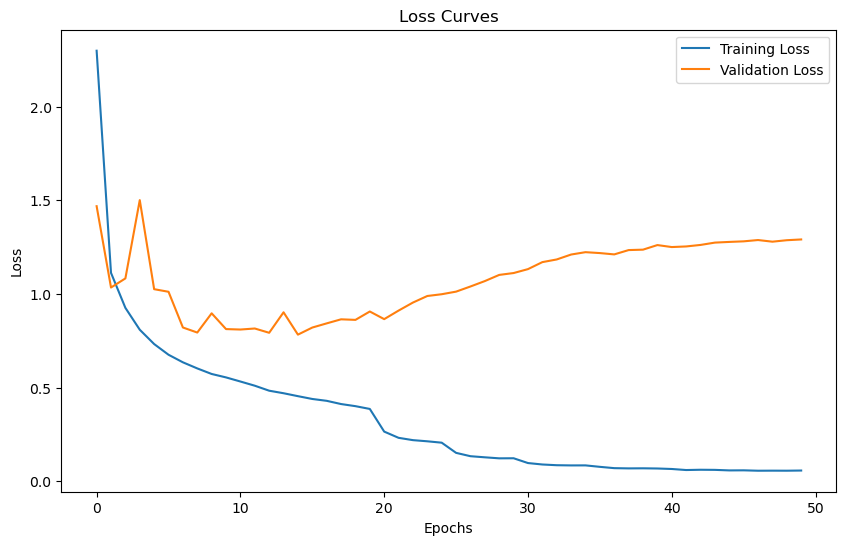

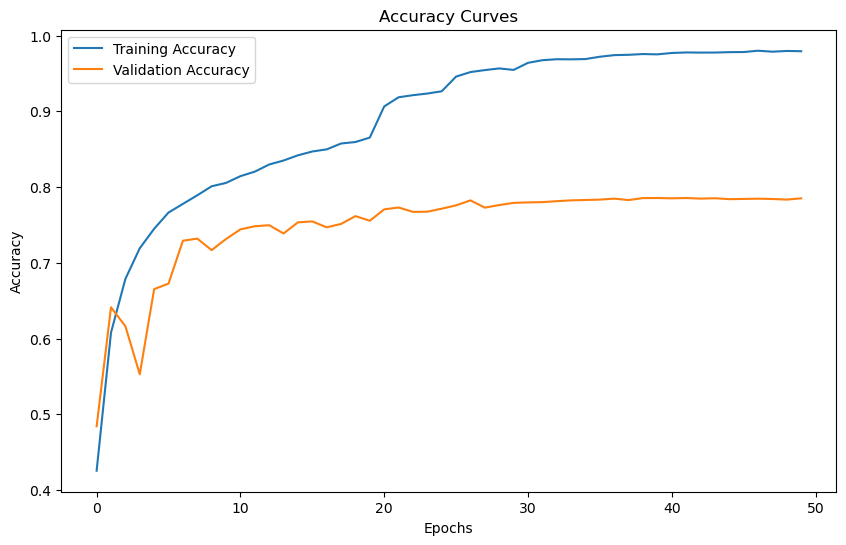

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, ReduceLROnPlateau
# 加載 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 正規化圖像數據
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 將標籤數據轉換為 one-hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def create_model(learning_rate=0.01, dropout_rate=0.4):
    model = Sequential()
    # 第一組卷積層
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    
    # 第二組卷積層
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    
    # 第三組卷積層
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    
    # 第四組卷積層
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    
    # 第五組卷積層
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))

    # 第六組卷積層
    model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
  
    model.add(Flatten())

    # 全連接層
    model.add(Dense(1024, activation='relu'))  
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # 輸出層
    model.add(Dense(10, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 創建模型
model = create_model()

# 打印模型摘要
model.summary()

# 创建回调函数
csv_logger = CSVLogger('training.log')  # 記錄訓練過程中的指標
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-9)  # 自適應調整學習率

history = model.fit(x_train, y_train, batch_size=64, epochs=75,
                    validation_data=(x_test, y_test),
                    callbacks=[csv_logger, reduce_lr])
# 保存整个模型
model.save('my_model.h5')

# 在測試集上評估
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

import pandas as pd
import matplotlib.pyplot as plt

# 读取训练日志
log_data = pd.read_csv('training.log')

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(log_data['epoch'], log_data['loss'], label='Training Loss')
plt.plot(log_data['epoch'], log_data['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制准确率曲线
plt.figure(figsize=(10, 6))
plt.plot(log_data['epoch'], log_data['accuracy'], label='Training Accuracy')
plt.plot(log_data['epoch'], log_data['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

